## Question 4 Curve of dimensionality

When the dimensionality is high, one problem of KNN is that a test point will not be closer to any training points. This is referred to as the curse of dimensionality.

## Question 10 Weekly change of stock market

In [78]:
library(ISLR)

In [79]:
str(Weekly)

'data.frame':	1089 obs. of  9 variables:
 $ Year     : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ Lag1     : num  0.816 -0.27 -2.576 3.514 0.712 ...
 $ Lag2     : num  1.572 0.816 -0.27 -2.576 3.514 ...
 $ Lag3     : num  -3.936 1.572 0.816 -0.27 -2.576 ...
 $ Lag4     : num  -0.229 -3.936 1.572 0.816 -0.27 ...
 $ Lag5     : num  -3.484 -0.229 -3.936 1.572 0.816 ...
 $ Volume   : num  0.155 0.149 0.16 0.162 0.154 ...
 $ Today    : num  -0.27 -2.576 3.514 0.712 1.178 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 1 1 2 2 2 1 2 2 2 1 ...


In [80]:
attach(Weekly)

The following objects are masked from Weekly (pos = 6):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



In [81]:
head(Weekly)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


In [82]:
library(tidyr)
library(ggplot2)

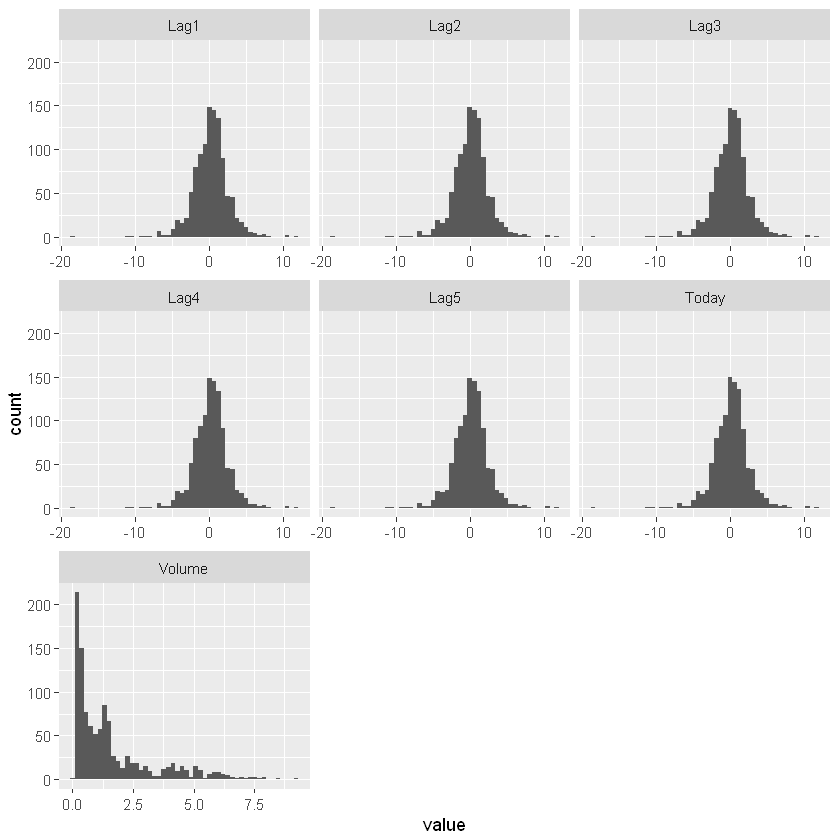

In [83]:
ggplot(gather(Weekly[-c(1, 9)]), aes(value)) + geom_histogram(bins = 50) + facet_wrap(~key, scales = 'free_x')

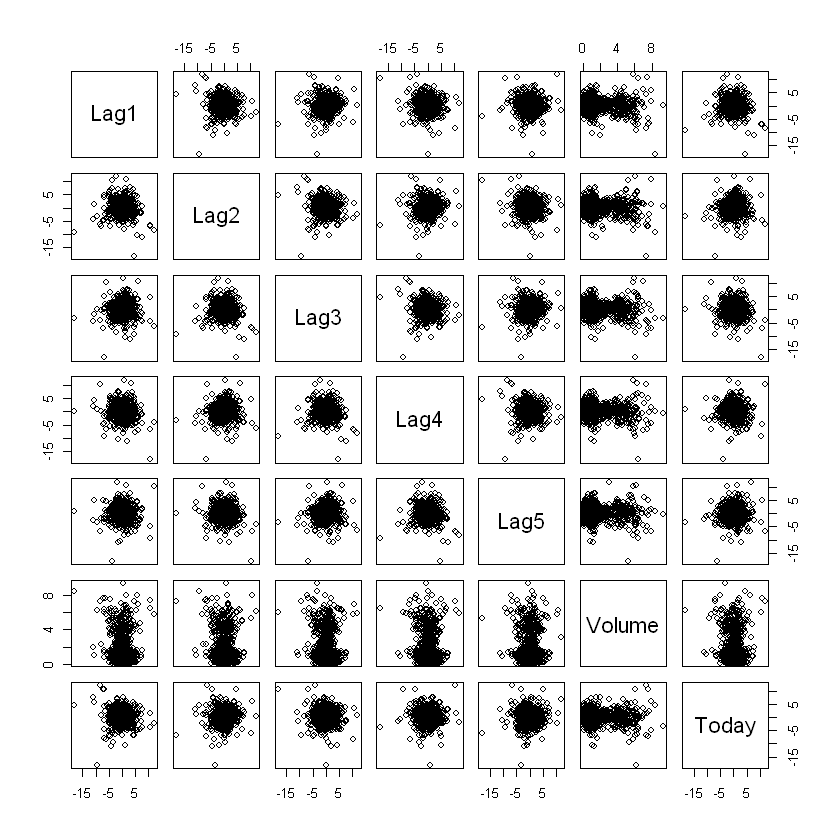

In [84]:
pairs(Weekly[-c(1, 9)])

In [85]:
fit = glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Weekly, family = binomial)
summary(fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


In [86]:
fit.prob = predict(fit, type = "response")

In [87]:
fit.pred = rep("Down", length(fit.prob))
fit.pred[fit.prob >= 0.5] = "Up"

In [88]:
table(fit.pred, Direction)

        Direction
fit.pred Down  Up
    Down   54  48
    Up    430 557

In [89]:
train = (Year <= 2008)
test  = (Year >= 2009)

### Logistic regression

In [90]:
glm.fit = glm(Direction ~ Lag2, subset = train, family = binomial)
glm.fit


Call:  glm(formula = Direction ~ Lag2, family = binomial, subset = train)

Coefficients:
(Intercept)         Lag2  
     0.2033       0.0581  

Degrees of Freedom: 984 Total (i.e. Null);  983 Residual
Null Deviance:	    1355 
Residual Deviance: 1351 	AIC: 1355

In [91]:
Lag2.test = data.frame(Lag2 = Lag2[test])
Direction.test = Direction[test]

In [92]:
glm.probs = predict(glm.fit, newdata = Lag2.test, type = "response")

In [93]:
glm.pred = ifelse(glm.probs >= 0.5, "Up", "Down")

In [94]:
table(glm.pred, Direction.test)

        Direction.test
glm.pred Down Up
    Down    9  5
    Up     34 56

### LDA

In [95]:
library(class)
library(MASS)

In [96]:
lda.fit = lda(Direction ~ Lag2, subset = train)
lda.fit

Call:
lda(Direction ~ Lag2, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

In [97]:
lda.pred = predict(lda.fit, Lag2.test)
lda.pred

Down,Up
0.4736555,0.5263445
0.3558617,0.6441383
0.5132860,0.4867140
0.5142948,0.4857052
0.4799727,0.5200273
0.4597586,0.5402414
0.3771117,0.6228883
0.5184724,0.4815276
0.5480397,0.4519603
0.5146118,0.4853882


In [98]:
table(lda.pred$class, Direction.test)

      Direction.test
       Down Up
  Down    9  5
  Up     34 56

### QDA

In [99]:
qda.fit = qda(Direction ~ Lag2, subset = train)
qda.fit

Call:
qda(Direction ~ Lag2, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

In [100]:
qda.pred = predict(qda.fit, Lag2.test)
qda.pred

Down,Up
0.4784630,0.5215370
0.2693952,0.7306048
0.4735416,0.5264584
0.4729118,0.5270882
0.4802735,0.5197265
0.4709913,0.5290087
0.3285302,0.6714698
0.4700366,0.5299634
0.4374287,0.5625713
0.4727086,0.5272914


In [101]:
table(qda.pred$class, Direction.test)

      Direction.test
       Down Up
  Down    0  0
  Up     43 61

### KNN with k=1

In [102]:
library(class)
# Use cbind to convert a series into a matrix
train.X = cbind(Lag2[train])
train.y = cbind(Direction[train])
test.X = cbind(Lag2[test])
knn.pred = knn(train.X, test.X, train.y, k=1)
knn.pred

[1] 2 2 1 1 1 2 2 1 2 1 2 1 2 2 2 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 2 2 1 2 2 2
 [38] 1 1 2 1 1 1 1 2 1 1 2 1 2 2 2 1 1 2 2 1 2 1 1 2 1 1 1 1 1 1 2 2 2 2 2 1 2
 [75] 2 2 2 2 1 2 2 2 1 1 1 2 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 1 2
Levels: 1 2

In [103]:
table(knn.pred, Direction.test)

        Direction.test
knn.pred Down Up
       1   21 30
       2   22 31

Of course one can further experiment with different parameters and try to do the best but I will just stop here. I wonder if there is any academic paper trying to figure out whether it is feasible to predict the stock market using logistic regression/LDA/QDA/KNN.

## Quqestion 11 Gas mileage prediction

In [104]:
attach(Auto)

The following objects are masked from Auto (pos = 5):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following object is masked from package:ggplot2:

    mpg



In [146]:
mpg.median = median(mpg)

In [188]:
mpg01 = ifelse(mpg >= mpg.median, 1, 0)

In [189]:
Auto.extended = data.frame(Auto, mpg01 = factor(mpg01))

In [190]:
head(Auto.extended)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
15,8,350,165,3693,11.5,70,1,buick skylark 320,0
18,8,318,150,3436,11.0,70,1,plymouth satellite,0
16,8,304,150,3433,12.0,70,1,amc rebel sst,0
17,8,302,140,3449,10.5,70,1,ford torino,0
15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


In [191]:
library(reshape2)

In [192]:
Auto.m = melt(Auto.extended[-9], id.var = "mpg01")
Auto.m

mpg01,variable,value
<fct>,<fct>,<dbl>
0,mpg,18
0,mpg,15
0,mpg,18
0,mpg,16
0,mpg,17
0,mpg,15
0,mpg,14
0,mpg,14
0,mpg,14


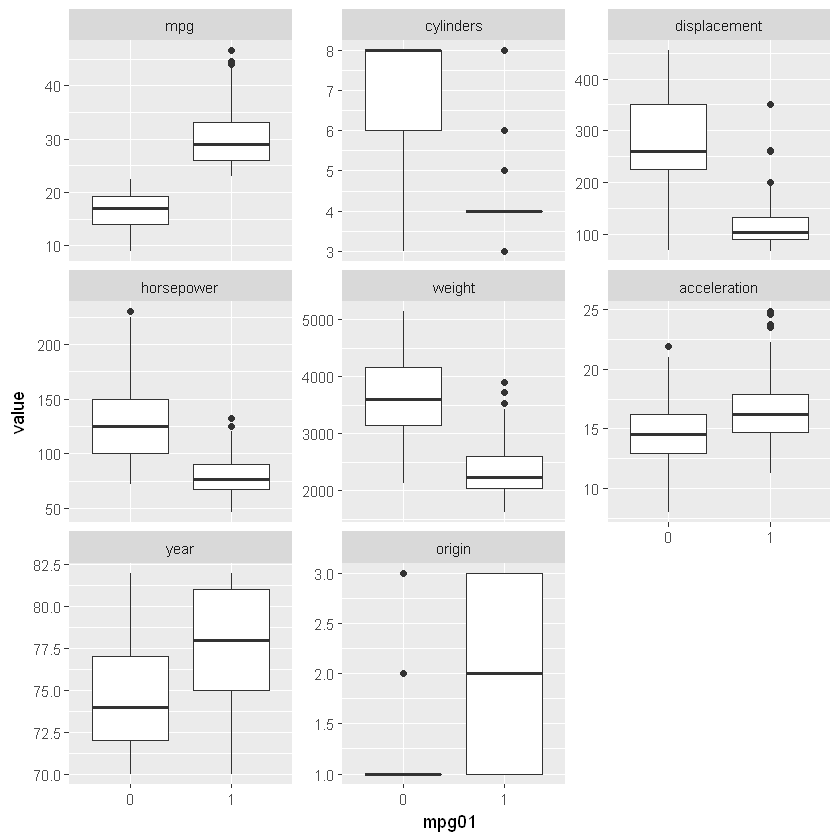

In [193]:
ggplot(aes(x = mpg01, y = value), data = Auto.m) + geom_boxplot() + facet_wrap(~variable, scales = "free_y")

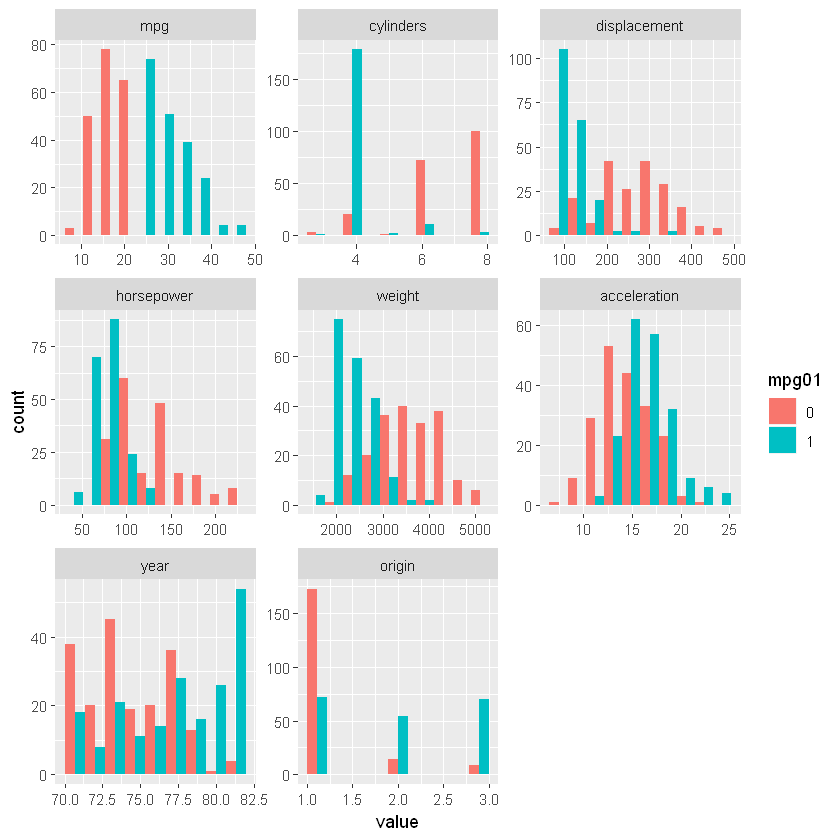

In [194]:
ggplot(aes(x = value, group = mpg01, fill = mpg01), data = Auto.m) + geom_histogram(position = "dodge", bins = 10) + 
    facet_wrap(~variable, scales = "free") # do NOT forget the fill = 'xxx' in aes(...) otherwise the bins would not be colored

### Logistic regression

In [195]:
str(Auto.extended)

'data.frame':	392 obs. of  10 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : num  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...
 $ mpg01       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


In [196]:
train = sample(1:nrow(Auto.extended),  300)
train

[1] 120 226 187   7 161 104 365  99 326 294 371 239 171 350 255 147 299  90
 [19] 341 138 163 352 240 198 280 231 305 150  93 314 249 195 159 270 346 369
 [37] 185  23  85 173 318 219 380 382 144 136 344 225 356 279  28 288 283 248
 [55]  10 176  82 121 212  67 183  33 320 137 268 133 152 220 339 211 146 167
 [73] 102 141 186 297  92 254 364 192  47 204 238  24  51 164 107 145 278 216
 [91]  68 243 134  88 384 241 234  72 125 153 275 166 286 131 370  63 269  96
[109] 345 332 129 284 289 281 335 338 306 277  49  40  75 142 337 177 190 127
[127] 221 181  43 309 330 117 261  81 175 322 310 264 235  31 160  64 262 328
[145] 109 151 126 342 290  62 119 210 333  66 124 354 100 331 233 101  48  29
[163]  39 130 388 368 196 232 214 307 139  78 191  26 128 256 272 319 178 180
[181] 252 296 193 108  11 357  80  42 327 303  57  71 313  84  27 148 116 366
[199]  56 324 253 266 110  59 118  18 103 360 363 385 258  38  95 158 378 202
[217]   3 154 224  17  76 207 359 135 106 236  70  41 203  94 156 386  77   1
[235] 377 172 251   9 222  16 387 304  65  37 353  60  20 376 263  86  50 189
[253]  45 390 217 336   8 329 298  89 250  97 351  12 373 391   4  25  21 379
[271] 223  19 169  61 201  46 349  32 381   2 165  53 312  13 302  34 287 113
[289] 174  44 111   5 372 355 168  87 200 218 293 321

In [200]:
glm.fit = glm(as.double(mpg01) ~ cylinders + displacement + horsepower + weight + acceleration + year + origin,
    data = Auto.extended, subset = train)
glm.fit


Call:  glm(formula = as.double(mpg01) ~ cylinders + displacement + horsepower + 
    weight + acceleration + year + origin, data = Auto.extended, 
    subset = train)

Coefficients:
 (Intercept)     cylinders  displacement    horsepower        weight  
  -0.5026450    -0.1110353     0.0002124     0.0030085    -0.0002677  
acceleration          year        origin  
   0.0124921     0.0363480     0.0633491  

Degrees of Freedom: 299 Total (i.e. Null);  292 Residual
Null Deviance:	    74.88 
Residual Deviance: 26.89 	AIC: 145.8

In [201]:
summary(glm.fit)


Call:
glm(formula = as.double(mpg01) ~ cylinders + displacement + horsepower + 
    weight + acceleration + year + origin, data = Auto.extended, 
    subset = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.90437  -0.16764   0.06731   0.19246   0.83223  

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.026e-01  4.868e-01  -1.033 0.302675    
cylinders    -1.110e-01  3.288e-02  -3.377 0.000832 ***
displacement  2.124e-04  8.134e-04   0.261 0.794214    
horsepower    3.009e-03  1.461e-03   2.059 0.040346 *  
weight       -2.677e-04  7.326e-05  -3.653 0.000307 ***
acceleration  1.249e-02  1.061e-02   1.177 0.240027    
year          3.635e-02  5.314e-03   6.841 4.63e-11 ***
origin        6.335e-02  2.970e-02   2.133 0.033747 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.09209776)

    Null deviance: 74.880  on 299  degrees of freedom
R

In [210]:
glm.prob = predict(glm.fit, newdata = Auto.extended[-train, ], type = "response")
glm.pred = ifelse(glm.prob >= 0.5, 1, 0)

In [211]:
table(glm.pred, mpg01[-train])

        
glm.pred  0  1
       1 40 52

Not a good job done by logistic regression since all the cars are predicted to have a good mpg while the truth is not.

### LDA

In [214]:
lda.fit = lda(as.double(mpg01) ~ cylinders + displacement + horsepower + weight + acceleration + year + origin,
    data = Auto.extended, subset = train)
lda.fit

Call:
lda(as.double(mpg01) ~ cylinders + displacement + horsepower + 
    weight + acceleration + year + origin, data = Auto.extended, 
    subset = train)

Prior probabilities of groups:
   1    2 
0.52 0.48 

Group means:
  cylinders displacement horsepower   weight acceleration     year   origin
1  6.807692     275.0513  131.23077 3615.571     14.43718 74.09615 1.134615
2  4.229167     119.6944   79.80556 2376.264     16.51250 77.71528 1.972222

Coefficients of linear discriminants:
                       LD1
cylinders    -0.4617131748
displacement  0.0008830148
horsepower    0.0125103023
weight       -0.0011130279
acceleration  0.0519454250
year          0.1511442859
origin        0.2634218202

In [216]:
lda.pred = predict(lda.fit, newdata = Auto.extended[-train, ])

In [222]:
table(lda.pred$class, mpg01[-train])

   
     0  1
  1 31  0
  2  9 52

So a much better job is done by LDA. 

### QDA

In [226]:
qda.fit = qda(as.double(mpg01) ~ cylinders + displacement + horsepower + weight + acceleration + year + origin,
    data = Auto.extended, subset = train)
qda.fit

Call:
qda(as.double(mpg01) ~ cylinders + displacement + horsepower + 
    weight + acceleration + year + origin, data = Auto.extended, 
    subset = train)

Prior probabilities of groups:
   1    2 
0.52 0.48 

Group means:
  cylinders displacement horsepower   weight acceleration     year   origin
1  6.807692     275.0513  131.23077 3615.571     14.43718 74.09615 1.134615
2  4.229167     119.6944   79.80556 2376.264     16.51250 77.71528 1.972222

In [227]:
qda.pred = predict(qda.fit, newdata = Auto.extended[-train, ])

In [228]:
table(qda.pred$class, mpg01[-train])

   
     0  1
  1 35  0
  2  5 52